# COGS 118A- Project Proposal

# Project Description

You will design and execute a machine learning project. There are a few constraints on the nature of the allowed project. 
- The problem addressed will not be a "toy problem" or "common training students problem" like mtcars, iris, palmer penguins etc.
- The dataset will have >1k observations and >5 variables. I'd prefer more like >10k observations and >10 variables. A general rule is that if you have >100x more observations than variables, your solution will likely generalize a lot better. The goal of training a supervised machine learning model is to learn the underlying pattern in a dataset in order to generalize well to unseen data, so choosing a large dataset is very important.

- The project will include a model selection and/or feature selection component where you will be looking for the best setup to maximize the performance of your ML system.
- You will evaluate the performance of your ML system using more than one appropriate metric
- You will be writing a report describing and discussing these accomplishments


Feel free to delete this description section when you hand in your proposal.

### Peer Review

You will all have an opportunity to look at the Project Proposals of other groups to fuel your creativity and get more ideas for how you can improve your own projects. 

Both the project proposal and project checkpoint will have peer review.

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Kody Chuang
- Nikki Rejai
- Jennifer Jiang
- Elise Davis


# Abstract 

 By using various supervised machine learning techniques we aim to distinguish which mushrooms in our dataset are poisonous and which are safe to eat. First we will split our data into a training set and test set. We will use linear and logistic regression, decision trees, k nearest neighbors, support vector machines and ensembles to classify the training set. Then using Nested Cross Validation we will determine the best hyper parameters for each model and then compare the performance between the models. We will use confusion matrices to check specificity of each model and ROC-AUC curves to compare the performance of the models and select the one whose ROC-AUC score is closest to 1 as the best model. Then we will apply our model on our test set, and use the ROC-AUC score of our performance on the test set to be our measure of success of how well we could distinguish which mushrooms are poisonous. 

# Background


There are several risks of eating poisonous mushrooms. Consuming poisonous mushrooms can cause gastrointestinal issues, liver or kidney failure, hallucinations, and even death. The symptoms can differ depending on the species of mushroom and the amount that is ingested<a name="tran"></a>[<sup>[1]</sup>](#trannote). Poisonous mushrooms are still unsafe to consume even after cooking or heating them, so many experts suggest avoiding eating unknown wild mushrooms altogether<a name="fact"></a>[<sup>[2]</sup>](#factnote).

It is difficult to tell if mushrooms are poisonous or not from a glance. Mushrooms do not have a clear indicator of whether or not they are poisonous, unlike plants like poison oak or poison ivy. Additionally, there is no at-home test to safely decide whether a mushroom is poisonous or edible<a name="dep"></a>[<sup>[3]</sup>](#depnote). As a result, many sources simply recommend people to only consume store bought mushrooms to avoid suffering from mushroom poisoning.

There have been several reports of people accidentally consuming poisonous mushrooms, some of which were more life-threatening than others. From 1999 to 2016, the U.S. The National Poison Data System recorded over 7000 cases of mushroom exposure<a name="brand"></a>[<sup>[4]</sup>](#brandnote). While most of these cases were reported to result in little to no harm, in 2016, it is estimated that there were over 1300 emergency visits and 100 hospitalizations associated with poisonous mushroom ingestion in the United States alone<a name="cent"></a>[<sup>[5]</sup>](#centnote). Many of these cases occur due to people falsely identifying poisonous mushrooms as edible and can be easily prevented.   

Mushrooms have a variety of attributes that can be used to identify what species they belong to. For instance, different species may have unique odors, cap shapes, colors, or ring types. By studying various mushroom attributes, we hope to possibly lower the chances of people misidentifying poisonous mushrooms by creating a machine learning solution that can classify mushrooms as either edible or poisonous. 

# Problem Statement

Given various mushroom attributes such as shape, color, odor, and habitat, we want to be able to classify different species of gilled mushrooms as either edible or poisonous by applying machine learning techniques such as k-nearest neighbors and decision trees.


# Data

Dataset: https://archive-beta.ics.uci.edu/dataset/73/mushroom

This dataset describes characteristics of mushrooms. It has 22 variables, 8124 observations. Since the data is categorical we will use a one hot encoding on our data to transform it to numerical data so we can apply machine learning algorithms on the data. The “poisonous” variable is the target and thus will be removed when we are training the data. The rest of the variables are categorical descriptive characteristics of the mushrooms which we will use to predict whether they are poisonous


# Proposed Solution

First, we will one hot encode our data. The data is categorical and we don’t want to introduce a bias or order to the data, therefore one-hot encoding is the best solution. First we will split our data into training and testing data with a 70 30 percent split respectively. Because our data is so multi-dimensional with 22 variables, it would be incredibly difficult to plot the data and visualize its pattern, ruling out certain models such as kernels which heavily rely on being able to visualize the data. 
Because our data is binary and the mushroom is either poisonous or not, the models we will be testing are k nearest neighbors, trees, linear and logistic regression, as well as SVM and ensembles. To determine which of these models is best suited for our data we will be using Nested Cross Validation to determine the best hyper parameters for each model and then compare the performance between the models. From this, we will pick the best model. We want to ensure that our model is as accurate as possible, so we will be using the following evaluation metrics to test its performance.


# Evaluation Metrics

We will be using several different evaluation metrics to measure the percentage of correctly labeled mushrooms. Firstly we will use a confusion matrix and focus on the specificity, because incorrectly labeling a mushroom as edible can be incredibly dangerous. The specificity is calculated as the number of true negatives divided by the total number of negatives selected, we hope to get this number as close to zero as possible. We will also be using a ROC-AUC curve to visualize the comparison between models and select the one whose area is closest to 1. ROC-AUC is calculated by using the true positive rate as the x-axis and the false positive rate as the y-axis.


# Preliminary Results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
feature_names = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
target_names = ["edible", "inedible"]

df = pd.read_csv("./expanded", header = 0, names = ["edible", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"])
df

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,CLUSTERED,LEAVES


As you can see, there are some NaN rows at the bottom of our data, lets clear those

In [3]:
df.dropna(how = 'any')
df["edible"].unique()
df['edible'].value_counts()

EDIBLE                                                                    4487
POISONOUS                                                                 3928
----------------------------------------------------------------------       1
Name: edible, dtype: int64

In [4]:
df = df.loc[~((df['edible'] != 'EDIBLE') & (df['edible'] != 'POISONOUS'))]
df['edible'].value_counts()

EDIBLE       4487
POISONOUS    3928
Name: edible, dtype: int64

In [5]:
df = df.replace('EDIBLE', 1)
df = df.replace('POISONOUS', 0)
df["edible"].unique()

array([1, 0])

Before we encode the rest of our data, lets split into training and testing data to prevent data leakage

In [6]:
from sklearn.model_selection import train_test_split


y = pd.DataFrame(df["edible"])
X = df.loc[:, df.columns != "edible"]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.preprocessing import OneHotEncoder

# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse_output=False).fit(X_train)
encoded = enc.transform(X_train)
# convert it to a dataframe
X_train = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)

X_train

,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5636,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# create an encoder and fit the dataframe
encoded = enc.transform(X_test)
# convert it to a dataframe
X_test = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)

X_test

,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2773,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2774,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2775,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
yhat_train = clf.predict(X_train)
yhat_test = clf.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report

acc_train = accuracy_score(y_train, yhat_train)
acc_test = accuracy_score(y_test, yhat_test)

print(f'training set accuracy (n={y_train.shape[0]}): {acc_train:4.3f}')
print(f'test set accuracy (n={y_test.shape[0]}): {acc_test:4.3f}')
print()
print('classificiation report on test set performance')
print(classification_report(y_test, yhat_test))
print()

training set accuracy (n=5638): 0.987
test set accuracy (n=2777): 0.984

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1280
           1       1.00      0.97      0.99      1497

    accuracy                           0.98      2777
   macro avg       0.98      0.99      0.98      2777
weighted avg       0.98      0.98      0.98      2777




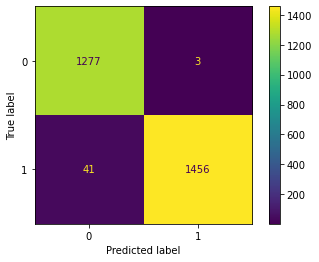

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yhat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Ethics & Privacy

One of the ethical issues we have has to deal with bias and discrimination. If our machine learning program is trained on biased or unrepresentative data, it may lead to discriminatory outcomes. For example, if the training data primarily consists of mushrooms from certain geographic regions, the program may misclassify mushrooms from underrepresented regions, potentially leading to false determinations of toxicity. To combat this, we must do extra research into our dataset ensuring diverse and representative training datasets to mitigate bias.

Another issue we must address deals with transparency and explainability. Because machine learning models can be so complex, ethical concerns arise regarding the transparency and explainability of the model's decision-making process. We must inform users about the limitations and uncertainties associated with the model's outputs to ensure responsible usage. Additionally, reliability and safety is a huge concern. The reliability and safety of our machine learning program are crucial ethical considerations. If the program produces inaccurate or unreliable results, it can have serious consequences, such as misclassifying toxic mushrooms as safe or vice versa. Robust testing, validation, and continuous monitoring are necessary to ensure the program's reliability and minimize potential harm. 

We must also address the ethical responsibility that extends to the appropriate use and dissemination of the machine learning program’s findings. Ensuring that our program is used for its intended purpose, such as assisting experts in making informed decisions rather than replacing human expertise entirely, is important. Additionally, clear communication of the program’s limitations and potential risks should be provided to users; informing users that we are not experts and using our algorithm may not give 100% accurate results. Furthermore, the last ethical considerations we want to address deals with the broader social and environmental impacts of our machine learning program. For instance, if the program’s predictions influence foraging practices or commercial mushroom harvesting, it could have implications for local ecosystems, sustainability, and the livelihoods of communities dependent on mushroom-related activities. Responsible usage and consideration of these broader impacts are crucial.



# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...

* Active engagement is expected from every team member throughout the entire project, which includes equal contributions to all project aspects and regular attendance at progress meetings.
* Each team member will be assigned specific project sections and corresponding deadlines, for which they will be accountable.
* All team members are encouraged to participate in decision-making processes concerning the project's topic, datasets, and data science question.
* The project necessitates well-commented and clear code, as well as proofreading and editing of both code and text, which should involve the entire team.
* Effective communication is vital, and team members are expected to promptly respond to project-related emails or other written communications.
* While teamwork and task completion are expected from all members, in case of non-cooperation or failure to fulfill responsibilities, the team should first address the matter directly with the member and escalate it to the professor if necessary.
* Group members should foster a collaborative environment by actively supporting and assisting their teammates. This includes offering help, sharing knowledge, and providing constructive feedback to promote the overall success of the project. 
* Group members should demonstrate adaptability and flexibility in dealing with changes or unforeseen circumstances that may arise during the project. 


# Project Timeline Proposal


5/10,        4PM     
**Completed Before Meeting:** We will engage in a collaborative discussion and review the project instructions collectively.
**Discuss at Meeting:** Assess the optimal mode of communication; Review the project thoroughly; Comprehend the tasks at hand; Engage in brainstorming sessions to generate topic ideas.

5/12,    4PM    
**Completed Before Meeting:** Generate ideas for a subject; Present a compilation of three topics each.
**Discuss at Meeting:** Introduce various topics and determine the chosen subject; Delve into the selected topic and explore datasets associated with it.

5/14,    7PM    
**Completed Before Meeting:** Review the COGS 118A Team Policies; Complete the section regarding group expectations.
**Discuss at Meeting:** Engage in a conversation about data cleaning techniques; Allocate proposal sections among team members; Work on assigned sections

5/16,    3PM    
**Completed Before Meeting:** Finish assigned project proposal sections
**Discuss at Meeting:** Put all proposal sections together; Proofread/review others’ sections; Submit project proposal

5/19,    1PM    
**Completed Before Meeting:** Individually look at data to brainstorm ideas on how/if need to clean data
**Discuss at Meeting:** Discuss proposed ideas and clean data if necessary; Discuss and research how to perform some sort of preliminary test (feature selection, hand-designing features, etc.)

5/24,    4PM    
**Completed Before Meeting:** Look at peer review projects/write down thoughts and opinions 
**Discuss at Meeting:** Discuss group members’ thoughts on peer review and compile onto peer review form. Divide checkpoint work.

5/28,    7PM    
**Completed Before Meeting:** Finish individual parts for Checkpoint
**Discuss at Meeting:** Discuss and combine individual parts to complete checkpoint; Turn in checkpoint; discuss future timeline

5/31,    4PM    
**Completed Before Meeting:** Research different machine learning algorithms and how to implement for our usage
**Discuss at Meeting:** Narrow down algorithms we want to use/start implementing algorithms; delegate algorithms/tests to do

6/5,     4PM    
**Completed Before Meeting:** Preliminarily finish assigned parts
**Discuss at Meeting:** Discuss assigned parts; ask questions; troubleshoot with group; 

6/9,     7PM    
**Completed Before Meeting:** Finish assigned parts if not done last meeting
**Discuss at Meeting:** Group review of individual parts to test if everything is valid and proofread, etc.; put together final project

6/14,    12PM   
**Completed Before Meeting:** Finish up last minute details/any outstanding errors 
**Discuss at Meeting:** Turn in Final Project



# Footnotes

<a name="trannote"></a>1.[^](#tran)Tran, H. H., &amp; Juergens, A. L. (2023, February 5). Mushroom Toxicity. National Library of Medicine. https://www.ncbi.nlm.nih.gov/books/NBK537111/#:~:text=Mushroom%20poisonings%20may%20range%20from,%2C%20toxins%2C%20and%20amount%20ingested. 

<a name="factnote"></a>2.[^](#fact) Fact sheets - wild mushroom poisoning. Wild mushroom poisoning - Fact sheets. (2023, May 10). https://www.health.nsw.gov.au/environment/factsheets/Pages/wild-mushroom-poisoning.aspx 

<a name="depnote"></a>3.[^](#dep)Department of Health & Human Services. (2001, October 31). Mushroom poisoning. Better Health Channel. https://www.betterhealth.vic.gov.au/health/healthyliving/fungi-poisoning 

<a name="brandnote"></a>4.[^](#brand) Brandenburg, W. E., & Ward, K. J. (2018, July 31). Mushroom poisoning epidemiology in the United States. Taylor and Francis Online . https://www.tandfonline.com/doi/full/10.1080/00275514.2018.1479561 

<a name="centnote"></a>5.[^](#cent) Centers for Disease Control and Prevention. (2021a, March 11). Health care utilization and outcomes associated with accidental poisonous mushroom ingestions - United States, 2016–2018. Centers for Disease Control and Prevention. https://www.cdc.gov/mmwr/volumes/70/wr/mm7010a1.htm 

